In [1]:
!pip install yellowbrick
import numpy as np
import pandas as pd

from sklearn.cluster import KMeans

from yellowbrick.cluster import KElbowVisualizer


import matplotlib
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt
plt.style.use('ggplot')


features = [
#     'Channel',
#     'Region',
    'Fresh',
    'Milk',
    'Grocery',
    'Frozen',
    'Detergents_Paper',
    'Delicatessen'
]


[notice] A new release of pip is available: 23.0.1 -> 23.1.1
[notice] To update, run: pip install --upgrade pip


In [2]:
df = pd.read_csv('data_with_latent.csv', index_col=0)
data = np.load('training_data.npy')

In [3]:
res_kpca = df[['x_kpca_cos', 'y_kpca_cos']].to_numpy()

In [4]:
clusterer = KMeans(n_clusters=5)
clusters = clusterer.fit_predict(res_kpca)

In [5]:
markers = list('*hH+xXDd|.,ov^<>12348spP')

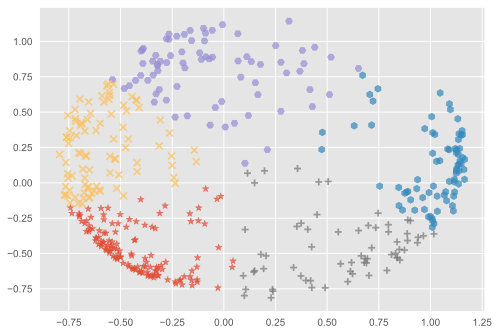

In [6]:
for cluster in np.unique(clusters):
    cluster_data = res_kpca[clusters==cluster]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], alpha=0.7, marker=markers[cluster])

/var/folders/v2/qf5dz3_96vlfbns8vfzjc0680000gn/T/ipykernel_87543/442363838.py:8: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(cluster_data[:, 0], cluster_data[:, 1], s=sizes, alpha=0.6, cmap=cols, marker=markers[cluster], label=f'Cluster {cluster}')


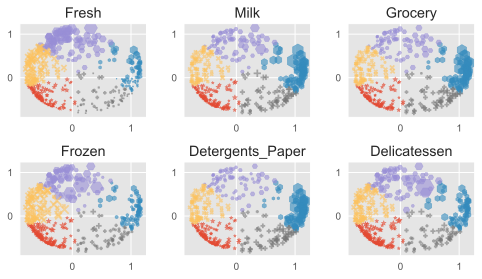

In [7]:
fig, axes = plt.subplots(2, 3, figsize=(7,4))

for feature, ax in zip(features, axes.ravel()):
    cols = 'viridis'
    for cluster in np.unique(clusters):
        sizes = 20+20*data[:, features.index(feature)][clusters==cluster]
        cluster_data = res_kpca[clusters==cluster]
        ax.scatter(cluster_data[:, 0], cluster_data[:, 1], s=sizes, alpha=0.6, cmap=cols, marker=markers[cluster], label=f'Cluster {cluster}')
    ax.set_title(feature)
plt.tight_layout()

In [8]:
df['cluster_kpca_rbf'] = clusters
df.to_csv('data_with_clusters.csv')

## Elbow Method

In [9]:
KElbowVisualizer?

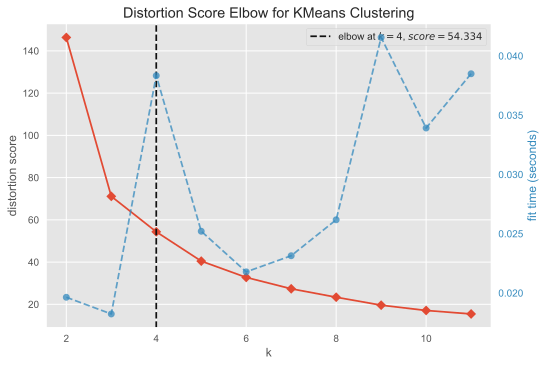

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [10]:
clusterer = KMeans()
visualizer = KElbowVisualizer(clusterer, k=(2, 12), metric='distortion')

visualizer.fit(res_kpca)        
visualizer.show()